## Simple simulation of classical gas particles closed in a square box

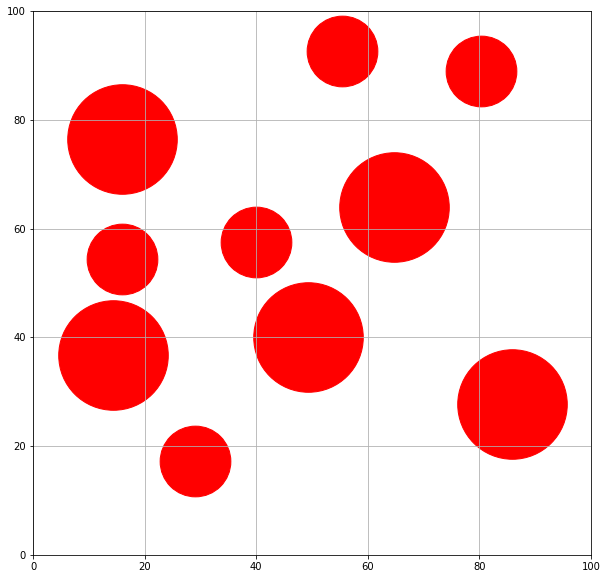

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Disc:
    def __init__(self,x,y,r):
        self.x = x
        self.y = y
        self.r = r
    
    def update_coordinates(self, new_x, new_y):
        self.x = new_x
        self.y = new_y
    
    def show(self):
        print("x = {:}, y={:}, r = {:}".format(self.x,self.y,self.r))


In [3]:
class Simulation:
    
    '''
        N - number of discs
        S - size of the board: [0,S]x[0,S]
        s - step size
        R1, R2 - disc radius
        k - number of epochs
    '''
    
    def __init__(self, N, S, s, R1, R2, k,scale=12):  
        
        if (S-2*R1)<0 or (S-2*R2)<0:
            raise ValueError("Wrong initial parameters.Too big radius for this board \n \
            R1 = {:}, R2 = {:}, board size: [0,{:}]x[0,{:}]".format(R1,R2,S,S))       
        
        self.N = N     
        self.S = S
        self.s = s     
        self.R1 = R1     
        self.R2 = R2   
        self.k = k           
        self.disc_tab = []
        self.color = 'red'
        self.scale = scale*self.S
        
    def check_validity(self,x,y,new_x, new_y,r):
        '''
            checking, whether the disc of radius r, pleaced at the point (x,y) or 
            moved to the new position (new_x, new_y) does not overlap any other disc 
            or the border of the box
        '''
        
        if ( (new_x-r)<0 or (new_y-r)<0 or (new_y+r)>self.S or (new_x+r) > self.S):
            return False               
        
        for disc in self.disc_tab:     
            if (disc.x!=x) and (disc.y!= y):
                if (disc.x-new_x)**2+(disc.y-new_y)**2<=(disc.r+r)**2:
                    return False
        return True
            
           
    def initiate(self):
        '''
            board initiation: generating N/2 valid positions for "big discs" of radius R1 and 
            N/2 valid positions for "small discs" of radius R2. The position is sampled from 2D
            uniform distribution.
            
        '''
                
        while( len(self.disc_tab) < self.N/2):              
            x,y =  np.random.uniform(0 + self.R1, self.S - self.R1, size=2)          
            if (self.check_validity(x,y,x,y,self.R1)):
                self.disc_tab.append(Disc(x,y,self.R1))
            
        while( len(self.disc_tab) < self.N):
            x,y =  np.random.uniform(0 + self.R2, self.S - self.R2, size=2)                     
            if (self.check_validity(x,y,x,y,self.R2)):
                self.disc_tab.append(Disc(x,y,self.R2))
    
    ## WORK IN PROGRESS #
    def step(self):      
        '''
            choosing one particle to move. checking, whether the move is allowed.
            If yes - proceed, if not - do nothing
        '''
        
        n=np.random.randint(0, len(self.disc_tab))
        disc = self.disc_tab[n]
        step_x, step_y = np.random.uniform(-self.s, self.s, size=2)
            
        new_x = step_x+disc.x
        new_y = step_y+disc.y 
                
        print("n=", n)
        disc.show()
        print("deltas:", step_x,step_y)
        print("new coordinates:", new_x,new_y)
                
        if self.check_validity(disc.x,disc.y,new_x,new_y,disc.r):
            disc.update_coordinates(new_x,new_y)
            print("success")

    
    def run(self):
        '''
            run the simulation
        '''
        
        for k in range(self.k):
            self.step()
            self.show()
            self.plot()
            
    def show(self):
        '''
            print the list of coordinates and radious of eery disc in self.disc_tab
        '''
        
        for disc in self.disc_tab:
            disc.show()
    
    def plot(self):
        '''
            show the board
        '''
        
        fig, ax = plt.subplots(figsize = (10, 10))
        ax.set_xlim(0,self.S)
        ax.set_ylim(0,self.S)
                       
        for disc in self.disc_tab:
            ax.scatter(disc.x, disc.y, c = self.color, s = disc.r*self.scale)      
        ax.grid()
        #ax.scatter(10, 10, c = 'blue', s =10*self.scale)   ## one blue dot, @ [10,10] with radius 10
        plt.show()
        
        

x = 64.6467499984982, y=64.0578767008686, r = 12
x = 85.90201340660182, y=27.819242630401785, r = 12
x = 50.044780069130404, y=40.1182792214245, r = 12
x = 14.388429524771599, y=36.780765817869785, r = 12
x = 16.50498800692587, y=76.80114261647796, r = 12
x = 55.35735392758532, y=92.70878875457868, r = 5
x = 16.000862578253454, y=54.49732781194454, r = 5
x = 29.08497660024128, y=17.18942483220308, r = 5
x = 40.02519895772038, y=57.53275511358122, r = 5
x = 80.27539179248154, y=88.95325946745811, r = 5
n= 4
x = 16.50498800692587, y=76.80114261647796, r = 12
deltas: 0.37934842675607205 -0.9326324984358494
new coordinates: 16.88433643368194 75.86851011804211
success
x = 64.6467499984982, y=64.0578767008686, r = 12
x = 85.90201340660182, y=27.819242630401785, r = 12
x = 50.044780069130404, y=40.1182792214245, r = 12
x = 14.388429524771599, y=36.780765817869785, r = 12
x = 16.88433643368194, y=75.86851011804211, r = 12
x = 55.35735392758532, y=92.70878875457868, r = 5
x = 16.000862578253454

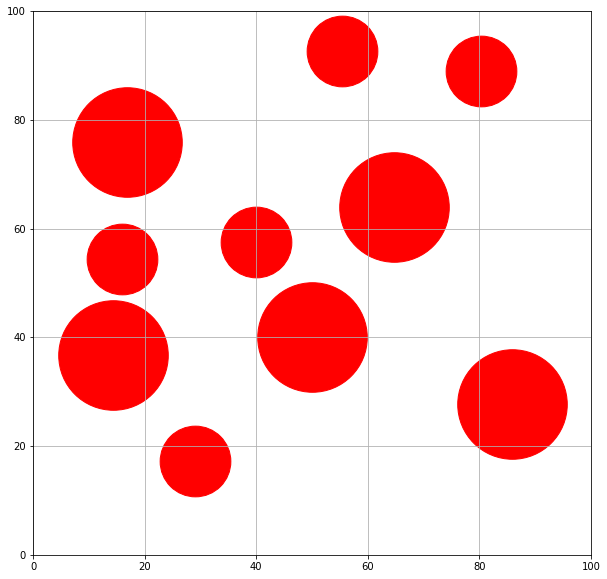

n= 2
x = 50.044780069130404, y=40.1182792214245, r = 12
deltas: -0.8255577098435238 -0.09151179671945497
new coordinates: 49.21922235928688 40.02676742470505
success
x = 64.6467499984982, y=64.0578767008686, r = 12
x = 85.90201340660182, y=27.819242630401785, r = 12
x = 49.21922235928688, y=40.02676742470505, r = 12
x = 14.388429524771599, y=36.780765817869785, r = 12
x = 16.88433643368194, y=75.86851011804211, r = 12
x = 55.35735392758532, y=92.70878875457868, r = 5
x = 16.000862578253454, y=54.49732781194454, r = 5
x = 29.08497660024128, y=17.18942483220308, r = 5
x = 40.02519895772038, y=57.53275511358122, r = 5
x = 80.27539179248154, y=88.95325946745811, r = 5


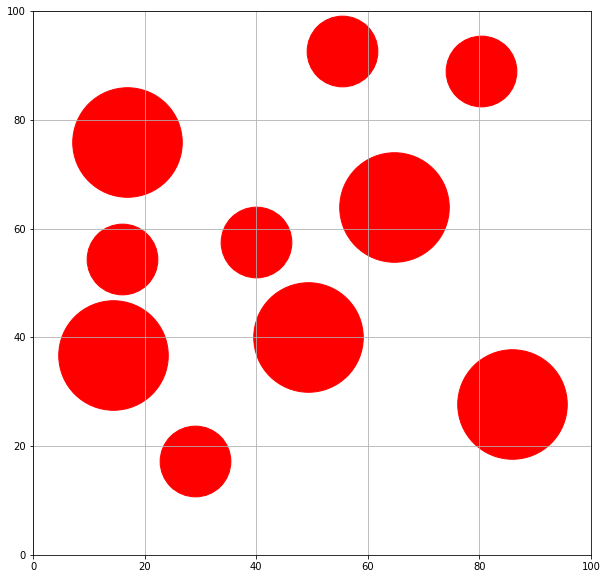

n= 4
x = 16.88433643368194, y=75.86851011804211, r = 12
deltas: -0.9164548336197729 0.5855065521869509
new coordinates: 15.967881600062169 76.45401667022907
success
x = 64.6467499984982, y=64.0578767008686, r = 12
x = 85.90201340660182, y=27.819242630401785, r = 12
x = 49.21922235928688, y=40.02676742470505, r = 12
x = 14.388429524771599, y=36.780765817869785, r = 12
x = 15.967881600062169, y=76.45401667022907, r = 12
x = 55.35735392758532, y=92.70878875457868, r = 5
x = 16.000862578253454, y=54.49732781194454, r = 5
x = 29.08497660024128, y=17.18942483220308, r = 5
x = 40.02519895772038, y=57.53275511358122, r = 5
x = 80.27539179248154, y=88.95325946745811, r = 5


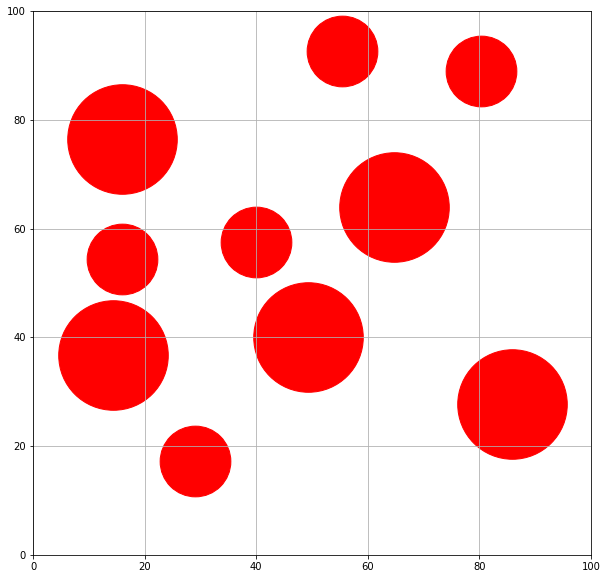

n= 8
x = 40.02519895772038, y=57.53275511358122, r = 5
deltas: -0.8384673104766518 0.8177477341032646
new coordinates: 39.186731647243725 58.35050284768448
success
x = 64.6467499984982, y=64.0578767008686, r = 12
x = 85.90201340660182, y=27.819242630401785, r = 12
x = 49.21922235928688, y=40.02676742470505, r = 12
x = 14.388429524771599, y=36.780765817869785, r = 12
x = 15.967881600062169, y=76.45401667022907, r = 12
x = 55.35735392758532, y=92.70878875457868, r = 5
x = 16.000862578253454, y=54.49732781194454, r = 5
x = 29.08497660024128, y=17.18942483220308, r = 5
x = 39.186731647243725, y=58.35050284768448, r = 5
x = 80.27539179248154, y=88.95325946745811, r = 5


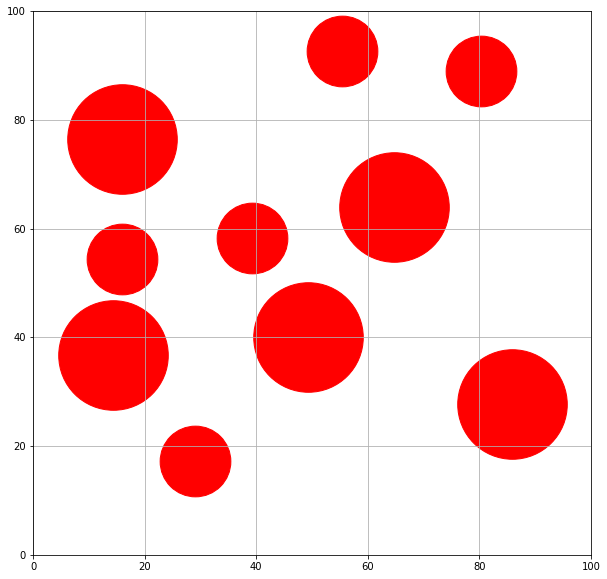

n= 6
x = 16.000862578253454, y=54.49732781194454, r = 5
deltas: 0.5181015422389503 -0.281854569877521
new coordinates: 16.518964120492406 54.21547324206701
success
x = 64.6467499984982, y=64.0578767008686, r = 12
x = 85.90201340660182, y=27.819242630401785, r = 12
x = 49.21922235928688, y=40.02676742470505, r = 12
x = 14.388429524771599, y=36.780765817869785, r = 12
x = 15.967881600062169, y=76.45401667022907, r = 12
x = 55.35735392758532, y=92.70878875457868, r = 5
x = 16.518964120492406, y=54.21547324206701, r = 5
x = 29.08497660024128, y=17.18942483220308, r = 5
x = 39.186731647243725, y=58.35050284768448, r = 5
x = 80.27539179248154, y=88.95325946745811, r = 5


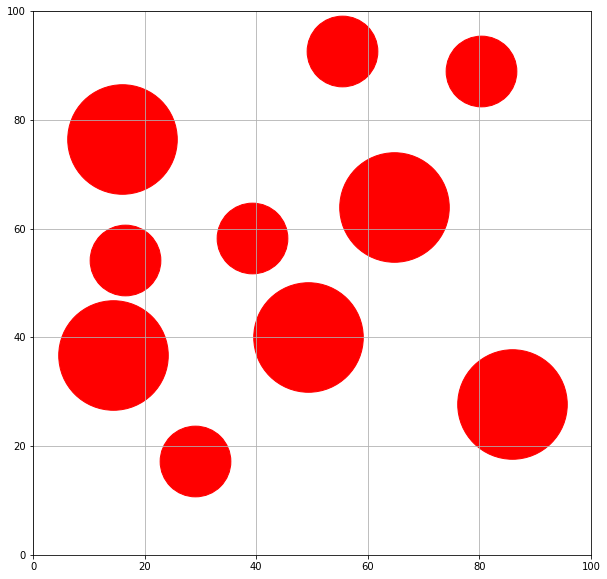

n= 6
x = 16.518964120492406, y=54.21547324206701, r = 5
deltas: 0.2907421757804307 0.12133551513782925
new coordinates: 16.809706296272836 54.33680875720484
success
x = 64.6467499984982, y=64.0578767008686, r = 12
x = 85.90201340660182, y=27.819242630401785, r = 12
x = 49.21922235928688, y=40.02676742470505, r = 12
x = 14.388429524771599, y=36.780765817869785, r = 12
x = 15.967881600062169, y=76.45401667022907, r = 12
x = 55.35735392758532, y=92.70878875457868, r = 5
x = 16.809706296272836, y=54.33680875720484, r = 5
x = 29.08497660024128, y=17.18942483220308, r = 5
x = 39.186731647243725, y=58.35050284768448, r = 5
x = 80.27539179248154, y=88.95325946745811, r = 5


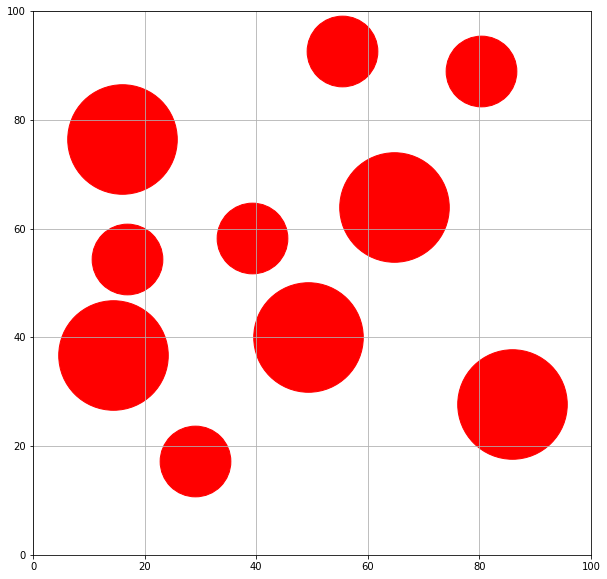

n= 9
x = 80.27539179248154, y=88.95325946745811, r = 5
deltas: 0.5730800409038488 0.27143570061647626
new coordinates: 80.84847183338539 89.22469516807459
success
x = 64.6467499984982, y=64.0578767008686, r = 12
x = 85.90201340660182, y=27.819242630401785, r = 12
x = 49.21922235928688, y=40.02676742470505, r = 12
x = 14.388429524771599, y=36.780765817869785, r = 12
x = 15.967881600062169, y=76.45401667022907, r = 12
x = 55.35735392758532, y=92.70878875457868, r = 5
x = 16.809706296272836, y=54.33680875720484, r = 5
x = 29.08497660024128, y=17.18942483220308, r = 5
x = 39.186731647243725, y=58.35050284768448, r = 5
x = 80.84847183338539, y=89.22469516807459, r = 5


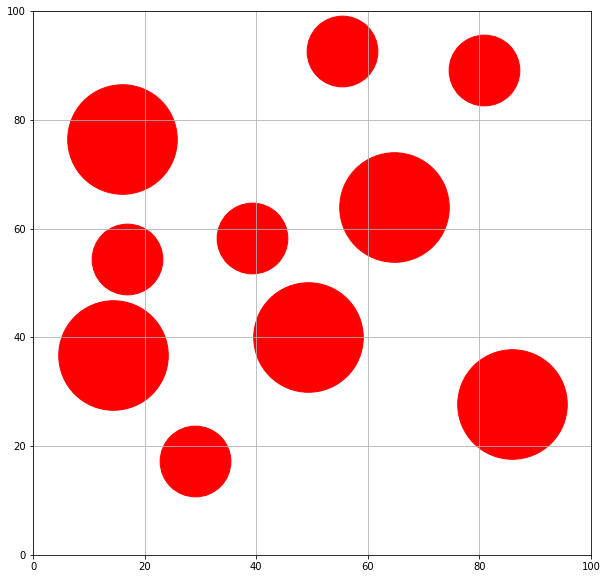

n= 6
x = 16.809706296272836, y=54.33680875720484, r = 5
deltas: -0.0699292295435956 -0.0414546896905692
new coordinates: 16.73977706672924 54.295354067514275
success
x = 64.6467499984982, y=64.0578767008686, r = 12
x = 85.90201340660182, y=27.819242630401785, r = 12
x = 49.21922235928688, y=40.02676742470505, r = 12
x = 14.388429524771599, y=36.780765817869785, r = 12
x = 15.967881600062169, y=76.45401667022907, r = 12
x = 55.35735392758532, y=92.70878875457868, r = 5
x = 16.73977706672924, y=54.295354067514275, r = 5
x = 29.08497660024128, y=17.18942483220308, r = 5
x = 39.186731647243725, y=58.35050284768448, r = 5
x = 80.84847183338539, y=89.22469516807459, r = 5


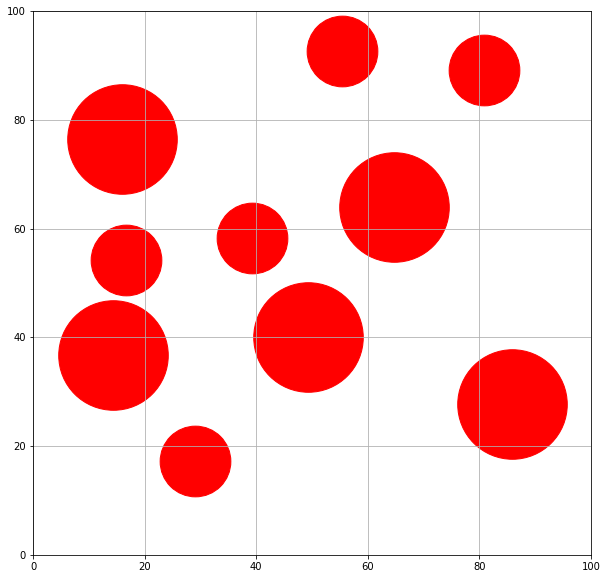

n= 5
x = 55.35735392758532, y=92.70878875457868, r = 5
deltas: -0.023662049262524132 -0.3445179857532963
new coordinates: 55.333691878322796 92.36427076882538
success
x = 64.6467499984982, y=64.0578767008686, r = 12
x = 85.90201340660182, y=27.819242630401785, r = 12
x = 49.21922235928688, y=40.02676742470505, r = 12
x = 14.388429524771599, y=36.780765817869785, r = 12
x = 15.967881600062169, y=76.45401667022907, r = 12
x = 55.333691878322796, y=92.36427076882538, r = 5
x = 16.73977706672924, y=54.295354067514275, r = 5
x = 29.08497660024128, y=17.18942483220308, r = 5
x = 39.186731647243725, y=58.35050284768448, r = 5
x = 80.84847183338539, y=89.22469516807459, r = 5


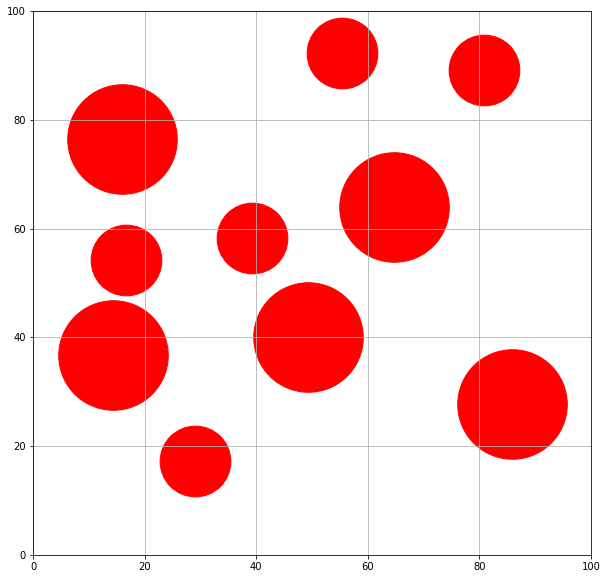

n= 2
x = 49.21922235928688, y=40.02676742470505, r = 12
deltas: 0.7296282446773734 0.847870167767564
new coordinates: 49.94885060396425 40.87463759247262
success
x = 64.6467499984982, y=64.0578767008686, r = 12
x = 85.90201340660182, y=27.819242630401785, r = 12
x = 49.94885060396425, y=40.87463759247262, r = 12
x = 14.388429524771599, y=36.780765817869785, r = 12
x = 15.967881600062169, y=76.45401667022907, r = 12
x = 55.333691878322796, y=92.36427076882538, r = 5
x = 16.73977706672924, y=54.295354067514275, r = 5
x = 29.08497660024128, y=17.18942483220308, r = 5
x = 39.186731647243725, y=58.35050284768448, r = 5
x = 80.84847183338539, y=89.22469516807459, r = 5


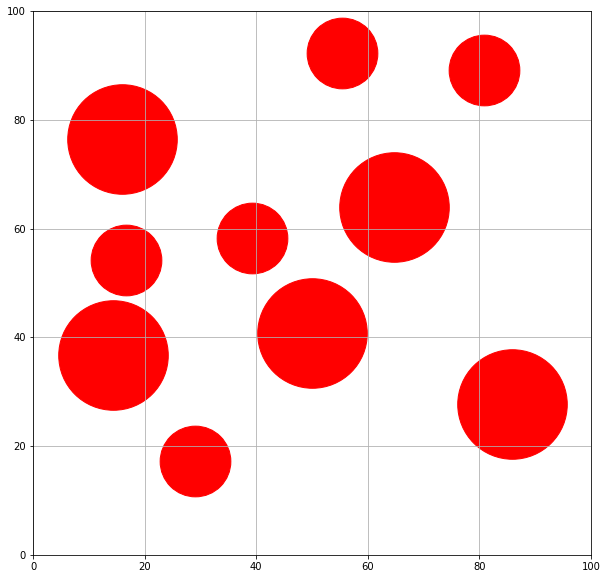

In [5]:
sim = Simulation(N =10, S =100, s=1, R1=12,R2=5,k=10, scale =10)  

sim.initiate()
sim.show()
sim.run()

## scaling note:

#### Problem with preserving the scale... 

* S = 100 - scale = 12
* S = 200 - scale = 1.5